# Simulando un computador real
En este notebook vamos a simular el comportamiento de uno de los computadores cuánticos de IBM utilizando el simulador de Aer.

In [1]:
from qiskit_ibm_provider import IBMProvider
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

#Selecciono el backend a simular
provider=IBMProvider()
backend=provider.get_backend("ibm_kyoto")

#Consigo su perfil de ruido
noise_model_kyoto=NoiseModel.from_backend(backend)

#Consigo sus puertas basicas y mapa de conexiones
basis_gates_kyoto=backend.basis_gates
coupling_map_kyoto=backend.coupling_map

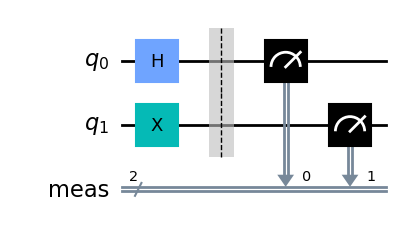

In [2]:
#Construyo un circuito
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.measure_all()
qc.draw()

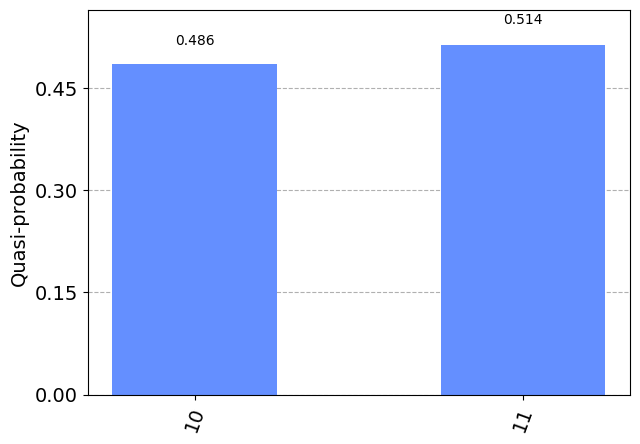

In [4]:
# Ejecuto utilizando el simulador Aer
job=execute(qc, Aer.get_backend('aer_simulator'),shots=1000)
#obtenemos los resultados
result=job.result()
countsideal=result.get_counts(qc)
plot_distribution(countsideal)

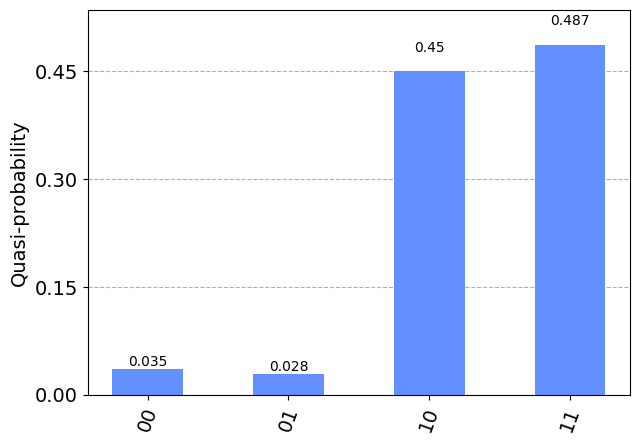

In [5]:
# Ejecuto utilizando el simulador Aer, pero usando el modelo de ruido, 
# las puertas basicas y el mapa de conexiones del computador real
job=execute(qc, Aer.get_backend('aer_simulator'),noise_model=noise_model_kyoto,basis_gates=basis_gates_kyoto,coupling_map=coupling_map_kyoto, shots=1000)
#obtenemos los resultados
result=job.result()
countsnoise=result.get_counts(qc)
plot_distribution(countsnoise)

In [6]:
#Imito las características del computador real
#utilizando el método from_backend
backend=AerSimulator.from_backend(backend)


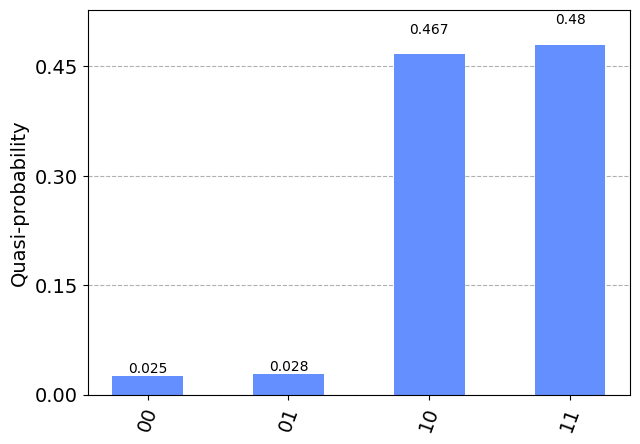

In [7]:
job=execute(qc,backend,shots=1000)
#obtenemos los resultados
result=job.result()
countsbackend=result.get_counts(qc)
plot_distribution(countsbackend)

In [9]:
#recupero las salidas de la ejecucion real anterior (notebook monitorizacion)
job=provider.retrieve_job('cnkrjybtakkg008rf5v0')
result=job.result()
countsreal=result.get_counts()

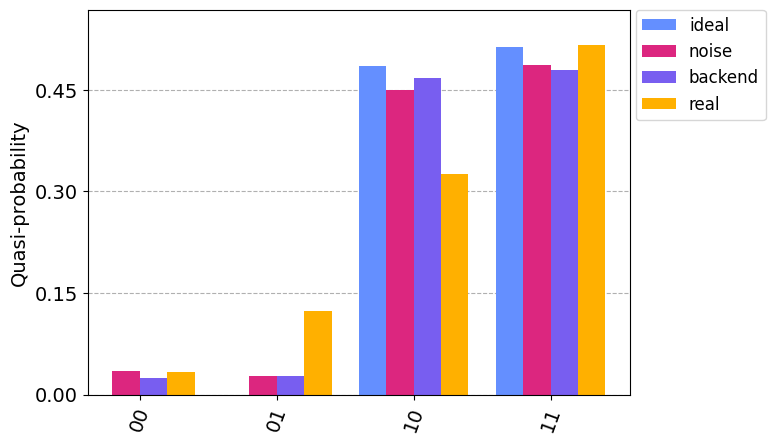

In [12]:
#represento todas las salidas juntas
plot_distribution([countsideal,countsnoise,countsbackend,countsreal],legend=['ideal','noise','backend','real'], bar_labels=False)

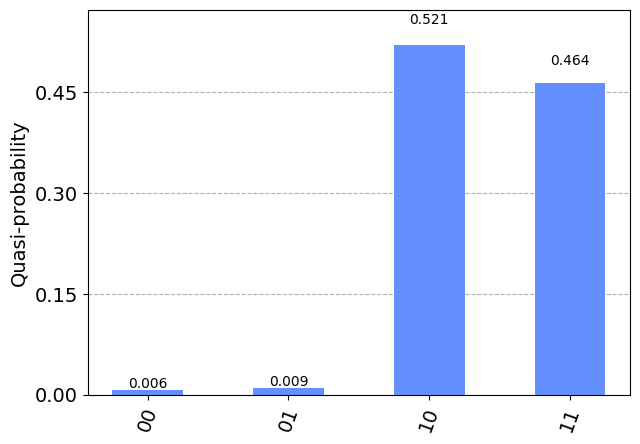

In [13]:
#Consigo imitar las características del computador real
#utilizando un fake backend
from qiskit.providers.fake_provider import FakeLagosV2

#establezco como backend el fake backend
backend = FakeLagosV2()

#ejecuto sobre el fake backend 
job=execute(qc,backend,shots=1000)
#obtenemos los resultados
result=job.result()
counts=result.get_counts(qc)
plot_distribution(counts)


In [14]:
import qiskit.tools.jupyter
%qiskit_version_table